In [48]:
import os
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [49]:
# Download NLTK Data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Load Train and Test Data
train_path = 'Desktop/train.csv'  
test_path = 'Desktop/test.csv'   
train_data = pd.read_csv(train_path, header=None, names=["Class Index", "Title", "Description"])
test_data = pd.read_csv(test_path, header=None, names=["Class Index", "Title", "Description"])

In [51]:
#Combine Title and Description
# Create a single column with all the text data
train_data['Text'] = train_data['Title'] + " " + train_data['Description']
test_data['Text'] = test_data['Title'] + " " + test_data['Description']

In [52]:
#Preprocess Text
# Remove unnecessary words and clean text
def clean_text(text):
    text = text.lower()  # Make text lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokens = word_tokenize(text)  # Break text into individual words
    return ' '.join(tokens)  # Join the cleaned words back into a single string

# Apply the cleaning function to the text data
train_data['Cleaned_Text'] = train_data['Text'].apply(clean_text)
test_data['Cleaned_Text'] = test_data['Text'].apply(clean_text)

In [53]:
#Split Data
# Separate training data into input (X) and labels (y)
X = train_data['Cleaned_Text']
y = train_data['Class Index']

# Split into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
#Convert Text to Numbers
# Use TF-IDF to represent text as numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X_train_tfidf = vectorizer.fit_transform(X_train)  # Learn vocabulary from training data
X_val_tfidf = vectorizer.transform(X_val)  # Transform validation data using the same vocabulary
X_test_tfidf = vectorizer.transform(test_data['Cleaned_Text'])  # Transform test data

In [55]:
#Train a Model
# Use Logistic Regression for classification
model = LogisticRegression(max_iter=1000)  # Allow up to 1000 iterations for optimization
model.fit(X_train_tfidf, y_train)  # Train the model on the training data


LogisticRegression(max_iter=1000)


=== Validation Results ===
Validation Accuracy: 0.9087121369942919


C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.92      0.90      0.91      6047
           2       0.95      0.97      0.96      5872
           3       0.89      0.87      0.88      6079
           4       0.88      0.90      0.89      6002
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.91     24001
   macro avg       0.73      0.73      0.73     24001
weighted avg       0.91      0.91      0.91     24001



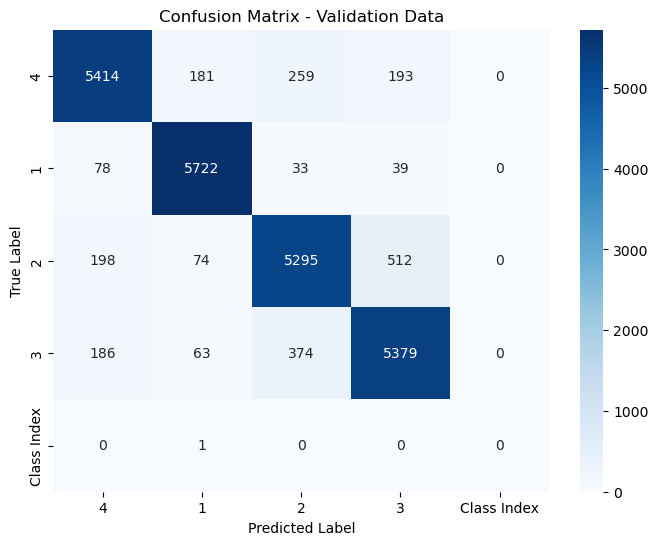


=== Test Results ===
Test Accuracy: 0.9052756216287331
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.87      0.87      1900
           4       0.88      0.88      0.88      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.91      7601
   macro avg       0.72      0.72      0.72      7601
weighted avg       0.90      0.91      0.90      7601


=== Test Results ===
Test Accuracy: 0.9052756216287331


C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feras\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feras\anaconda33\Lib\site-packages\sklearn\

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.87      0.87      1900
           4       0.88      0.88      0.88      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.91      7601
   macro avg       0.72      0.72      0.72      7601
weighted avg       0.90      0.91      0.90      7601



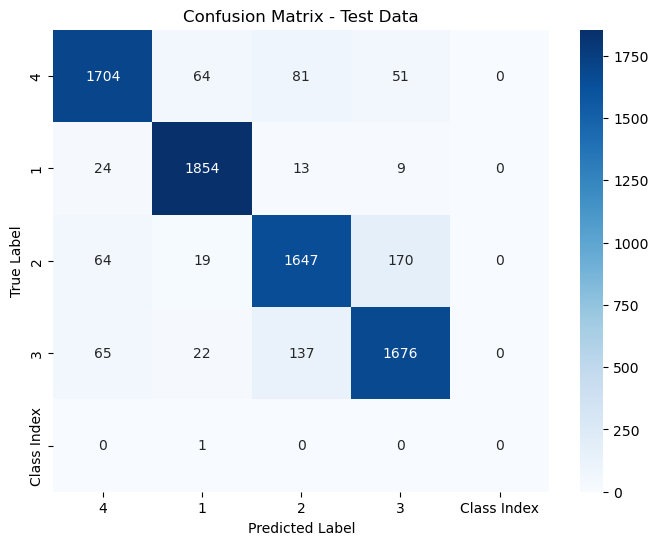

In [56]:
print("\n=== Validation Results ===")
y_val_pred = model.predict(X_val_tfidf)  # Predict labels for validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))  # Calculate accuracy
print(classification_report(y_val, y_val_pred))  # Detailed classification report
# Plot Confusion Matrix for Validation Data
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n=== Test Results ===")
y_test_pred = model.predict(X_test_tfidf)  # Predict labels for test set
print("Test Accuracy:", accuracy_score(test_data['Class Index'], y_test_pred))  # Test accuracy
print(classification_report(test_data['Class Index'], y_test_pred))  # Test classification rep
# Evaluate on Test Data
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(test_data['Class Index'], y_test_pred)
print("\n=== Test Results ===")
print("Test Accuracy:", test_accuracy)
print(classification_report(test_data['Class Index'], y_test_pred))

# Plot Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(test_data['Class Index'], y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [57]:
# Evaluate on Training Data
y_train_pred = model.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\n=== Training Results ===")
print("Training Accuracy:", train_accuracy)
print(classification_report(y_train, y_train_pred))



=== Training Results ===
Training Accuracy: 0.9244270833333333
              precision    recall  f1-score   support

           1       0.94      0.91      0.92     23953
           2       0.96      0.98      0.97     24128
           3       0.90      0.89      0.90     23921
           4       0.90      0.91      0.90     23998

    accuracy                           0.92     96000
   macro avg       0.92      0.92      0.92     96000
weighted avg       0.92      0.92      0.92     96000



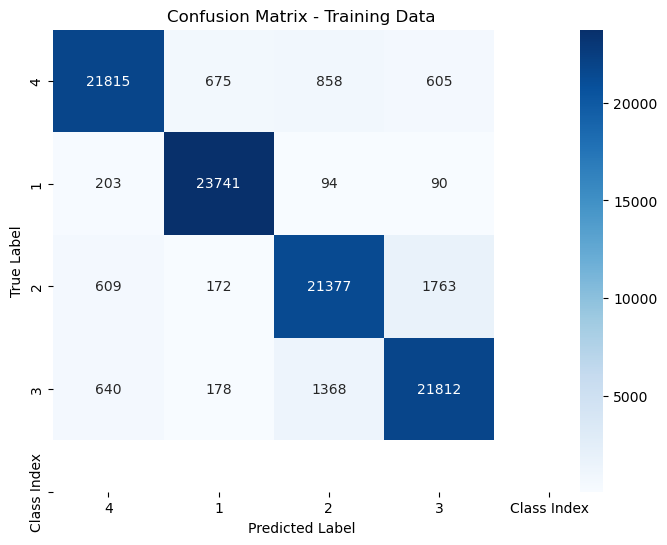

In [58]:
# Plot Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
